In [1]:
# Data loading 

import numpy as np
import cv2
import glob
import pandas as pd
import re
from sklearn.model_selection import train_test_split, GroupKFold, GroupShuffleSplit
import matplotlib.pyplot as plt
cmap_data = plt.cm.Paired
%matplotlib

Using matplotlib backend: TkAgg


## Train-val-test split

In [73]:
from src.data import TrainValTestSplitter
from src import *
data_path = f'{DATA_PATH}/XR_HAND'

In [74]:
splitter = TrainValTestSplitter(path_to_data=data_path)

=================Train subset=================
Size: 2846
Percentage from original data: 0.5134403752480606
Percentage of negatives: 1.0
Number of patients: 1017
=============Validation subset===============
Size: 1356
Percentage from original data: 0.24463287028684827
Percentage of negatives: 0.4837758112094395
Number of patients: 473
=================Test subset=================
Size: 1341
Percentage from original data: 0.2419267544650911
Percentage of negatives: 0.4153616703952274
Number of patients: 474


In [70]:
import matplotlib
custom_cmap_1 = matplotlib.colors.ListedColormap([(185/255,224/255,165/255), (255/255,217/255,102/255)])
custom_cmap_2 = matplotlib.colors.ListedColormap([(255/255,217/255,102/255),
                                                  (218/255,232/255,252/255), (185/255,224/255,165/255)])

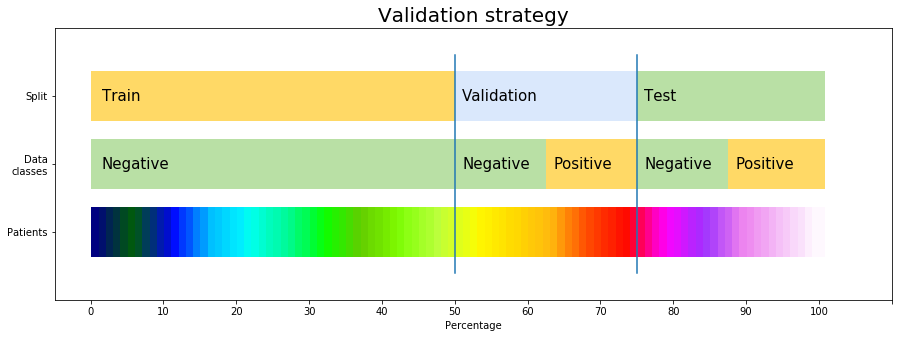

In [72]:
n_points = 100

percentiles_split = [.5, .25, .25]
train_classes = [1, .0]
val_classes = [0.5, 0.5]
test_classes = [0.5, 0.5]

split = np.hstack([[ii] * int(1000 * perc) for ii, perc in enumerate(percentiles_split)])
train_classes = np.hstack([[ii] * int(500 * perc) for ii, perc in enumerate(train_classes)])
val_classes = np.hstack([[ii] * int(250 * perc) for ii, perc in enumerate(val_classes)])
test_classes = np.hstack([[ii] * int(250 * perc) for ii, perc in enumerate(test_classes)])
groups = np.hstack([[ii] * 10 for ii in range(100)])


def visualize_groups(split, groups, name):
    # Visualize dataset groups
    fig, ax = plt.subplots(figsize = (15, 5))
    ax.scatter(range(len(groups)),  [.5] * len(groups), c=groups, marker='_', lw=50, cmap='gist_ncar',
                  edgecolor='black')
    train_size = int(percentiles_split[0]*len(groups))
    val_size = int(percentiles_split[1]*len(groups)) 
    test_size = int(percentiles_split[2]*len(groups))

    ax.axvline(495, ymin=0.1, ymax=0.9)
    ax.axvline(745, ymin=0.1, ymax=0.9)
    
    ax.scatter(range(train_size), [2] * train_size, c=train_classes, marker='_', lw=50, cmap=custom_cmap_1)
    ax.scatter(range(train_size, train_size+val_size),  [2] * val_size, c=val_classes, marker='_', lw=50, cmap=custom_cmap_1)
    ax.scatter(range(train_size+val_size, train_size+val_size+test_size),  [2] * test_size, c=val_classes, marker='_', lw=50, cmap=custom_cmap_1)
    ax.text(10, 1.9, 'Negative', fontsize=15)
    ax.text(505, 1.9, 'Negative', fontsize=15)
    ax.text(505+125, 1.9, 'Positive', fontsize=15)
    ax.text(755, 1.9, 'Negative', fontsize=15)
    ax.text(755+125, 1.9, 'Positive', fontsize=15)
    
    
    ax.scatter(range(len(groups)),  [3.5] * len(groups), c=split, marker='_', lw=50, cmap=custom_cmap_2)
    ax.text(10, 3.4, 'Train', fontsize=15)
    ax.text(505, 3.4, 'Validation', fontsize=15)
    ax.text(755, 3.4, 'Test', fontsize=15)
    
    
    ax.set(ylim=[-1, 5], yticks=[.5, 2.0, 3.5], xticks = range(-5, 1100, 100), xticklabels = range(0, 110, 10),
           yticklabels=['Patients', 'Data\nclasses', 'Split'], xlabel="Percentage")
    ax.set_title('Validation strategy', fontsize=20)

visualize_groups(split, groups, 'no groups')
plt.savefig('validation_strategy.png', dpi=400)